
You’ll often need to examine the relationship between the corresponding elements of two variables in a dataset. Say there are two variables, 𝑥 and 𝑦, with an equal number of elements, 𝑛. Let 𝑥₁ from 𝑥 correspond to 𝑦₁ from 𝑦, 𝑥₂ from 𝑥 to 𝑦₂ from 𝑦, and so on. You can then say that there are 𝑛 pairs of corresponding elements: (𝑥₁, 𝑦₁), (𝑥₂, 𝑦₂), and so on.

You’ll see the following measures of correlation between pairs of data:

  * Positive correlation exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
  * Negative correlation exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
  * Weak or no correlation exists if there is no such apparent relationship.

The following figure shows examples of negative, weak, and positive correlation:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-08.5a1e9f3e3aa4.png', width=75% />
</div>

The plot on the left with the red dots shows negative correlation. The plot in the middle with the green dots shows weak correlation. Finally, the plot on the right with the blue dots shows positive correlation.

Note: There’s one important thing you should always have in mind when working with correlation among a pair of variables, and that’s that correlation is not a measure or indicator of causation, but only of association!

The two statistics that measure the correlation between datasets are covariance and the correlation coefficient. Let’s define some data to work with these measures. You’ll create two Python lists and use them to get corresponding NumPy arrays and pandas Series:

In [1]:
import numpy as np
import pandas as pd
import scipy
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

Now that you have the two variables, you can start exploring the relationship between them.

## Covariance

The sample covariance is a measure that quantifies the strength and direction of a relationship between a pair of variables (termed cross-covariance).  This is sometimes done at different lead/lag ($k$) between the two variables. This can also be done with a single variable at different lags, _i.e._, the auto-covariance.  There are two related concepts, namely the auto- and cross-correlations.

\begin{eqnarray}
   Auto \: covariance & : & r_{xx}(k)  = \frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x} \right) \left(x_{i+k} - \bar{x} \right) \\
   Auto \: correlation & : & \rho_{xx}(k) = \frac{r_{xx}(k)}{s_{xx}} \\
   Covariance & : & r_{xy} (k)  = \frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x} \right) \left(y_{i+k} - \bar{y} \right) \\
   Cross \: correlation & : & \rho_{xy}(k) = \frac{r_{xy}(k)}{s_{x} s_{y}}
\end{eqnarray}

Notes:
  * Recall here that $s_x$ is the standard deviation of $x$ and $s_{xx}$ is the variance of $x$
  * $\rho_{xy}$ is referred to as the correlation coefficient
  * If the auto-covariance is done at zero lag ($k=0$) then the auto-covariance becomes the variance ($r_{xx} = s_{xx}$) and the auto-correlation is 1
  * If the cross-correlation is done at zero lag ($k=0$) and for the same variables ($x=y$) then the same result occurs ($r_{xx} = s_{xx}$ and cross-correlation is 1)
  * If the correlation is positive, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
  * If the correlation is negative, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
  * If the correlation is weak, then the covariance is close to zero.


This is how you can calculate the covariance in pure Python:


In [2]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
print(cov_xy)

19.95


First, you have to find the mean of x and y. Then, you apply the mathematical formula for the covariance.

NumPy has the function cov() that returns the covariance matrix:

In [3]:
cov_matrix = np.cov(x_, y_)
print(cov_matrix)

[[38.5        19.95      ]
 [19.95       13.91428571]]


Note that cov() has the optional parameters bias, which defaults to False, and ddof, which defaults to None. Their default values are suitable for getting the sample covariance matrix. The upper-left element of the covariance matrix is the covariance of x and x, or the variance of x. Similarly, the lower-right element is the covariance of y and y, or the variance of y. You can check to see that this is true:

In [4]:
print(x_.var(ddof=1))
print(y_.var(ddof=1))

38.5
13.914285714285711


As you can see, the variances of x and y are equal to cov_matrix[0, 0] and cov_matrix[1, 1], respectively.

The other two elements of the covariance matrix are equal and represent the actual covariance between x and y:

In [5]:
cov_xy = cov_matrix[0, 1] 
print(cov_xy)
cov_xy = cov_matrix[1, 0]
print(cov_xy)

19.95
19.95


You’ve obtained the same value of the covariance with np.cov() as with pure Python.

pandas Series have the method .cov() that you can use to calculate the covariance:


In [6]:
cov_xy = x__.cov(y__)
print(cov_xy)

cov_xy = y__.cov(x__)
print(cov_xy)

19.95
19.95


Here, you call .cov() on one Series object and pass the other object as the first argument.

## Correlation Coefficient

The correlation coefficient, or Pearson product-moment correlation coefficient, is denoted by the symbol $\rho$ (also sometimes as $r$). The coefficient is another measure of the correlation between data. You can think of it as a standardized covariance. Here are some important facts about it:

  * The value 𝑟 > 0 indicates positive correlation.
  * The value 𝑟 < 0 indicates negative correlation.
  * The value r = 1 is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
  * The value r = −1 is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
  * The value r ≈ 0, or when 𝑟 is around zero, means that the correlation between variables is weak.

If you have the means ($\bar{x}$ and $\bar{y}$) and standard deviations ($s_x$, $s_y$) for the datasets $x$ and $y$, as well as their covariance $r_{xy}$, then you can calculate the correlation coefficient with pure Python:

In [7]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
print(r)

0.861950005631606


You’ve got the variable r that represents the correlation coefficient.

scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value:

In [8]:
r, p = scipy.stats.pearsonr(x_, y_)
print(r)
print(p)

0.8619500056316061
5.122760847201132e-07


pearsonr() returns a tuple with two numbers. The first one is 𝑟 and the second is the 𝑝-value.

Similar to the case of the covariance matrix, you can apply np.corrcoef() with x_ and y_ as the arguments and get the correlation coefficient matrix:

In [9]:
corr_matrix = np.corrcoef(x_, y_)
print(corr_matrix)

[[1.         0.86195001]
 [0.86195001 1.        ]]


The upper-left element is the correlation coefficient between x_ and x_. The lower-right element is the correlation coefficient between y_ and y_. Their values are equal to 1.0. The other two elements are equal and represent the actual correlation coefficient between x_ and y_:


In [10]:
r = corr_matrix[0, 1]
print(r)

r = corr_matrix[1, 0]
print(r)

0.8619500056316061
0.861950005631606


Of course, the result is the same as with pure Python and pearsonr().

You can get the correlation coefficient with scipy.stats.linregress():


In [11]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

linregress() takes x_ and y_, performs linear regression, and returns the results. slope and intercept define the equation of the regression line, while rvalue is the correlation coefficient. To access particular values from the result of linregress(), including the correlation coefficient, use dot notation:


In [12]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
print(r)

0.861950005631606


That’s how you can perform linear regression and obtain the correlation coefficient.

pandas Series have the method .corr() for calculating the correlation coefficient:

In [13]:
r = x__.corr(y__)
print(r)

r = y__.corr(x__)
print(r)

0.8619500056316061
0.861950005631606


## Example: NumPy Correlation Calculation

NumPy has many statistics routines, including np.corrcoef(), that return a matrix of Pearson correlation coefficients. You can start by importing NumPy and defining two NumPy arrays. These are instances of the class ndarray. Call them x and y:


In [14]:
import numpy as np

# use np.arange() to create an array x of integers 
# between 10 (inclusive) and 20 (exclusive)
x = np.arange(10, 20)
print('x is', type(x), 'with values', x)

# use np.array() to create a second array y containing 
# arbitrary integers.
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print('y is', type(y), 'with values', y)

# call np.corrcoef() with both arrays as arguments:
r = np.corrcoef(x, y)
print('r is', type(r), 'with values', r)

x is <class 'numpy.ndarray'> with values [10 11 12 13 14 15 16 17 18 19]
y is <class 'numpy.ndarray'> with values [ 2  1  4  5  8 12 18 25 96 48]
r is <class 'numpy.ndarray'> with values [[1.         0.75864029]
 [0.75864029 1.        ]]


corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients. Here’s a simplified version of the correlation matrix you just created:

             x       y
     x    1.00    0.76
     y    0.76    1.00

The values on the main diagonal of the correlation matrix (upper left and lower right) are equal to 1. The upper left value corresponds to the correlation coefficient for x and x, while the lower right value is the correlation coefficient for y and y. They are always equal to 1.

However, what you usually need are the lower left and upper right values of the correlation matrix. These values are equal and both represent the Pearson correlation coefficient for x and y. In this case, it’s approximately 0.76.

This figure shows the data points and the correlation coefficients for the above example:

<div>
<img src = 'https://files.realpython.com/media/py-corr-5.2ee03a029ffe.png', width=50% />
</div>

The red squares are the data points. As you can see, the figure also shows the values of the three correlation coefficients.

## Example: SciPy Correlation Calculation

SciPy also has many statistics routines contained in scipy.stats. You can use the following methods to calculate the three correlation coefficients you saw earlier:

  * pearsonr()
  * spearmanr()
  * kendalltau()

In [15]:
import numpy as np
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

# Pearson's r
r, p = scipy.stats.pearsonr(x, y)
print('Pearson\'s r correlation:',r)
print('Pearson\'s r p-value:',p)

# Spearman's rho
r, p = scipy.stats.spearmanr(x, y)
print('Spearman\'s rho correlation:',r)
print('Spearman\'s rho p-value:',p)
      
# Kendall's tau
r, p = scipy.stats.kendalltau(x, y)
print('Kendall\'s tau correlation:',r)
print('Kendall\'s tau p-value:',p)

Pearson's r correlation: 0.758640289091187
Pearson's r p-value: 0.010964341301680815
Spearman's rho correlation: 0.9757575757575757
Spearman's rho p-value: 1.4675461874042197e-06
Kendall's tau correlation: 0.911111111111111
Kendall's tau p-value: 2.9761904761904762e-05


Note that these functions return objects that contain two values:

  * The correlation coefficient
  * The p-value

You use the p-value in statistical methods when you’re testing a hypothesis. The p-value is an important measure that requires in-depth knowledge of probability and statistics to interpret. To learn more about them, you can read about the basics or check out a data scientist’s explanation of p-values.

You can also extract the p-values and the correlation coefficients with their indices, or methods:

In [16]:
scipy.stats.pearsonr(x, y)[0]    # Pearson's r
scipy.stats.spearmanr(x, y)[0]   # Spearman's rho
scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

scipy.stats.spearmanr(x, y).correlation   # Spearman's rho
scipy.stats.kendalltau(x, y).correlation  # Kendall's tau

0.911111111111111

## Example: pandas Correlation Calculation

pandas is, in some cases, more convenient than NumPy and SciPy for calculating statistics. It offers statistical methods for Series and DataFrame instances. For example, given two Series objects with the same number of items, you can call .corr() on one of them with the other as the first argument:


In [17]:
import pandas as pd
x = pd.Series(range(10, 20))
print('x is', type(x), 'with values', x)
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print('y is', type(y), 'with values', y)

x is <class 'pandas.core.series.Series'> with values 0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
y is <class 'pandas.core.series.Series'> with values 0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64


In [18]:
# default is Pearson's r
x.corr(y)
y.corr(x)

# other methods
x.corr(y, method='spearman')
x.corr(y, method='kendall')

0.911111111111111

Here, you use .corr() to calculate all three correlation coefficients. You define the desired statistic with the parameter method, which can take on one of several values:

  * 'pearson'
  * 'spearman'
  * 'kendall'
  * a callable

The callable can be any function, method, or object with .__call__() that accepts two one-dimensional arrays and returns a floating-point number.

## Rank Correlation
Rank correlation compares the ranks or the orderings of the data related to two variables or dataset features. If the orderings are similar, then the correlation is strong, positive, and high. However, if the orderings are close to reversed, then the correlation is strong, negative, and low. In other words, rank correlation is concerned only with the order of values, not with the particular values from the dataset.

To illustrate the difference between linear and rank correlation, consider the following figure:

<div>
    <img src = 'https://files.realpython.com/media/py-corr-2.ac1acc7812d0.png', width=75% />
</div>

The left plot has a perfect positive linear relationship between x and y, so r = 1. The central plot shows positive correlation and the right one shows negative correlation. However, neither of them is a linear function, so r is different than −1 or 1.

When you look only at the orderings or ranks, all three relationships are perfect! The left and central plots show the observations where larger x values always correspond to larger y values. This is perfect positive rank correlation. The right plot illustrates the opposite case, which is perfect negative rank correlation.

## Spearman Correlation Coefficient

The Spearman correlation coefficient between two features is the Pearson correlation coefficient between their rank values. It’s calculated the same way as the Pearson correlation coefficient but takes into account their ranks instead of their values. It’s often denoted with the Greek letter rho (ρ) and called Spearman’s rho.

Say you have two n-tuples, x and y, where (x₁, y₁), (x₂, y₂), … are the observations as pairs of corresponding values. You can calculate the Spearman correlation coefficient ρ the same way as the Pearson coefficient. You’ll use the ranks instead of the actual values from x and y.

Here are some important facts about the Spearman correlation coefficient:

  * It can take a real value in the range −1 ≤ ρ ≤ 1.
  * Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.
  * Its minimum value ρ = −1 corresponds to the case when there’s a monotonically decreasing function between x and y. In other words, larger x values correspond to smaller y values and vice versa.

You can calculate Spearman’s rho in Python in a very similar way as you would Pearson’s r.

## Kendall Correlation Coefficient

Let’s start again by considering two n-tuples, x and y. Each of the x-y pairs (x₁, y₁), (x₂, y₂), … is a single observation. A pair of observations (xᵢ, yᵢ) and (xⱼ, yⱼ), where i < j, will be one of three things:

    concordant if either (xᵢ > xⱼ and yᵢ > yⱼ) or (xᵢ < xⱼ and yᵢ < yⱼ)
    discordant if either (xᵢ < xⱼ and yᵢ > yⱼ) or (xᵢ > xⱼ and yᵢ < yⱼ)
    neither if there’s a tie in x (xᵢ = xⱼ) or a tie in y (yᵢ = yⱼ)
The Kendall correlation coefficient compares the number of concordant and discordant pairs of data. This coefficient is based on the difference in the counts of concordant and discordant pairs relative to the number of x-y pairs. It’s often denoted with the Greek letter tau (τ) and called Kendall’s tau.

According to the scipy.stats official docs, the Kendall correlation coefficient is calculated as 

\begin{eqnarray}
  \tau = \frac{n^{+} - n^{-}}{\sqrt{(n^+ + n^- + n^x)(n^+ + n^- + n^y)}}
\end{eqnarray}

where:

    n⁺ is the number of concordant pairs
    n⁻ is the number of discordant pairs
    nˣ is the number of ties only in x
    nʸ is the number of ties only in y

If a tie occurs in both x and y, then it’s not included in either nˣ or nʸ.

The Wikipedia page on Kendall rank correlation coefficient gives the following expression: 

\begin{eqnarray}
  \tau = \left[ \frac{2}{n(n-1)} \right] \sum_i j sign(x_i-x_j) sign(y_i-y_j)
\end{eqnarray}

for i < j, where i = 1, 2, …, n − 1 and j = 2, 3, …, n. The sign function sign(z) is −1 if z < 0, 0 if z = 0, and 1 if z > 0. n(n − 1) / 2 is the total number of x-y pairs.

Some important facts about the Kendall correlation coefficient are as follows:

  * It can take a real value in the range −1 ≤ τ ≤ 1.
  * Its maximum value τ = 1 corresponds to the case when the ranks of the corresponding values in x and y are the same. In other words, all pairs are concordant.
  * Its minimum value τ = −1 corresponds to the case when the rankings in x are the reverse of the rankings in y. In other words, all pairs are discordant.

You can calculate Kendall’s tau in Python similarly to how you would calculate Pearson’s r.

## Rank: SciPy Implementation

You can use scipy.stats to determine the rank for each value in an array. First, you’ll import the libraries and create NumPy arrays:


In [19]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

print(scipy.stats.rankdata(x))
print(scipy.stats.rankdata(y))
print(scipy.stats.rankdata(z))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 2.  1.  3.  4.  5.  6.  7.  8. 10.  9.]
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


The arrays x and z are monotonic, so their ranks are monotonic as well. The smallest value in y is 1 and it corresponds to the rank 1. The second smallest is 2, which corresponds to the rank 2. The largest value is 96, which corresponds to the largest rank 10 since there are 10 items in the array.

rankdata() has the optional parameter method. This tells Python what to do if there are ties in the array (if two or more values are equal). By default, it assigns them the average of the ranks:

In [20]:
scipy.stats.rankdata([8, 2, 0, 2])

array([4. , 2.5, 1. , 2.5])

There are two elements with a value of 2 and they have the ranks 2.0 and 3.0. The value 0 has rank 1.0 and the value 8 has rank 4.0. Then, both elements with the value 2 will get the same rank 2.5.

rankdata() treats nan values as if they were large:

In [21]:
scipy.stats.rankdata([8, np.nan, 0, 2])

array([nan, nan, nan, nan])

In this case, the value np.nan corresponds to the largest rank 4.0. You can also get ranks with np.argsort():

In [22]:
np.argsort(y) + 1

array([ 2,  1,  3,  4,  5,  6,  7,  8, 10,  9])

argsort() returns the indices that the array items would have in the sorted array. These indices are zero-based, so you’ll need to add 1 to all of them.
Rank Correlation: NumPy and SciPy Implementation

You can calculate the Spearman correlation coefficient with scipy.stats.spearmanr():

In [23]:
result = scipy.stats.spearmanr(x, y)
print(result)
print(result.correlation)
print(result.pvalue)

rho, p = scipy.stats.spearmanr(x, y)
print(rho)
print(p)

SignificanceResult(statistic=0.9757575757575757, pvalue=1.4675461874042197e-06)
0.9757575757575757
1.4675461874042197e-06
0.9757575757575757
1.4675461874042197e-06


spearmanr() returns an object that contains the value of the Spearman correlation coefficient and p-value. As you can see, you can access particular values in two ways:

  1. Using dot notation (result.correlation and result.pvalue)
  2. Using Python unpacking (rho, p = scipy.stats.spearmanr(x, y))

You can get the same result if you provide the two-dimensional array xy that contains the same data as x and y to spearmanr():


In [24]:
xy = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
               [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]])
rho, p = scipy.stats.spearmanr(xy, axis=1)
print(rho)
print(p)

0.9757575757575757
1.4675461874042197e-06


The first row of xy is one feature, while the second row is the other feature. You can modify this. The optional parameter axis determines whether columns (axis=0) or rows (axis=1) represent the features. The default behavior is that the rows are observations and the columns are features.

Another optional parameter nan_policy defines how to handle nan values. It can take one of three values:

  * 'propagate' returns nan if there’s a nan value among the inputs. This is the default behavior.
  * 'raise' raises a ValueError if there’s a nan value among the inputs.
  * 'omit' ignores the observations with nan values.

If you provide a two-dimensional array with more than two features, then you’ll get the correlation matrix and the matrix of the p-values:


In [25]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
corr_matrix, p_matrix = scipy.stats.spearmanr(xyz, axis=1)
print(corr_matrix)
print(p_matrix)

[[ 1.          0.97575758 -1.        ]
 [ 0.97575758  1.         -0.97575758]
 [-1.         -0.97575758  1.        ]]
[[6.64689742e-64 1.46754619e-06 6.64689742e-64]
 [1.46754619e-06 6.64689742e-64 1.46754619e-06]
 [6.64689742e-64 1.46754619e-06 6.64689742e-64]]


The value -1 in the correlation matrix shows that the first and third features have a perfect negative rank correlation, that is that larger values in the first row always correspond to smaller values in the third.

You can obtain the Kendall correlation coefficient with kendalltau():

In [26]:
result = scipy.stats.kendalltau(x, y)
print(result)
print(result.correlation)
print(result.pvalue)

tau, p = scipy.stats.kendalltau(x, y)
print(tau)
print(p)

SignificanceResult(statistic=0.911111111111111, pvalue=2.9761904761904762e-05)
0.911111111111111
2.9761904761904762e-05
0.911111111111111
2.9761904761904762e-05


kendalltau() works much like spearmanr(). It takes two one-dimensional arrays, has the optional parameter nan_policy, and returns an object with the values of the correlation coefficient and p-value.

However, if you provide only one two-dimensional array as an argument, then kendalltau() will raise a TypeError. If you pass two multi-dimensional arrays of the same shape, then they’ll be flattened before the calculation.

## Rank Correlation: pandas Implementation

You can calculate the Spearman and Kendall correlation coefficients with pandas. Just like before, you start by importing pandas and creating some Series and DataFrame instances:


In [27]:
import pandas as pd
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

x.corr(y, method='spearman')
xy.corr(method='spearman')
xyz.corr(method='spearman')
xy.corrwith(z, method='spearman')

x.corr(y, method='kendall')
xy.corr(method='kendall')
xyz.corr(method='kendall')
xy.corrwith(z, method='kendall')

x-values   -1.000000
y-values   -0.911111
dtype: float64

## Visualization of Correlation

Data visualization is very important in statistics and data science. It can help you better understand your data and give you a better insight into the relationships between features. In this section, you’ll learn how to visually represent the relationship between two features with an x-y plot. You’ll also use heatmaps to visualize a correlation matrix.

You’ll learn how to prepare data and get certain visual representations, but you won’t cover many other explanations. To learn more about Matplotlib in-depth, check out Python Plotting With Matplotlib (Guide). You can also take a look at the official documentation and Anatomy of Matplotlib.


In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

Regression line: y=-85.93+7.44x, r=0.76


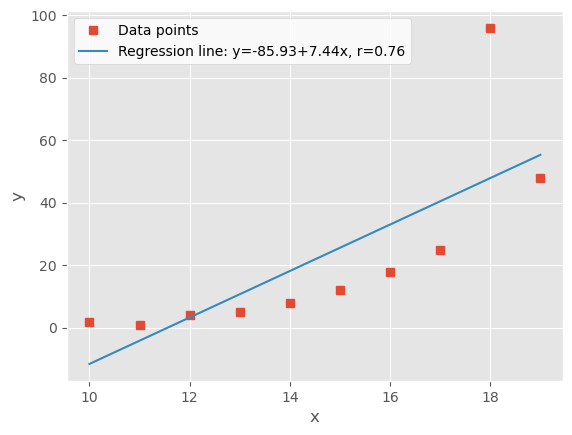

In [29]:
# X-Y Plots With a Regression Line

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')

The red squares represent the observations, while the blue line is the regression line. Its equation is listed in the legend, together with the correlation coefficient.
Remove ads
Heatmaps of Correlation Matrices

The correlation matrix can become really big and confusing when you have a lot of features! Fortunately, you can present it visually as a heatmap where each field has the color that corresponds to its value. You’ll need the correlation matrix:

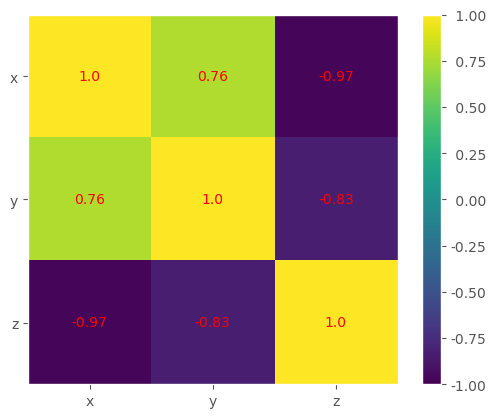

In [30]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
# note here we round the numbers in the correlation matrix 
# with .round(), as they’re going to be shown be on the heatmap.

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')

The result is a table with the coefficients. It sort of looks like the pandas output with colored backgrounds. The colors help you interpret the output. In this example, the yellow color represents the number 1, green corresponds to 0.76, and purple is used for the negative numbers.


# Describing data with statistics: Correlation
J. Potemra <br>
_April 2025_

----


You’ll often need to examine the relationship between the corresponding elements of two variables. Assuming two variables, $x$ and $y$, with an equal number of elements, $n$ denoted $x_i$ and $y_i$, you can then say that there are $n$ pairs of corresponding elements: $(x_1, y_1)$, $(x_2, y_2)$ and so on.

You’ll see the following measures of correlation between pairs of data:

  * Positive correlation exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
  * Negative correlation exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
  * Weak or no correlation exists if there is no such apparent relationship.

The following figure shows examples of negative, weak, and positive correlation:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-08.5a1e9f3e3aa4.png', width=75% />
</div>

The plot on the left with the red dots shows negative correlation. The plot in the middle with the green dots shows weak correlation. Finally, the plot on the right with the blue dots shows positive correlation.

Note: There’s one important thing you should always have in mind when working with correlation among a pair of variables, and that’s that correlation is not a measure or indicator of causation, but only of association!

The two statistics that measure the correlation between datasets are covariance and the correlation coefficient. Let’s define some data to work with these measures. You’ll create two Python lists and use them to get corresponding NumPy arrays and pandas Series:

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [32]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

Now that you have the two variables, you can start exploring the relationship between them.

#### Covariance

The sample covariance is a measure that quantifies the strength and direction of a relationship between a pair of variables:

  * If the correlation is positive, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
  * If the correlation is negative, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
  * If the correlation is weak, then the covariance is close to zero.

The covariance of the variables 𝑥 and 𝑦 is mathematically defined as 

\begin{eqnarray}
 s^{xy} = \frac{1}{n-1} \sum_i (x_i - \bar{x})(y_i-\bar{y})
\end{eqnarray}

where 𝑖 = 1, 2, …, 𝑛, mean(𝑥) is the sample mean of 𝑥, and mean(𝑦) is the sample mean of 𝑦. It follows that the covariance of two identical variables is actually the variance: 

\begin{eqnarray}
 s^{xx} = \frac{1}{n-1} \sum_i (x_i - \bar{x})^2 \\
 s^{yy} = \frac{1}{n-1} \sum_i (y_i - \bar{y})^2 
\end{eqnarray}

This is how you can calculate the covariance in pure Python:


In [33]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
print(cov_xy)

19.95


First, you have to find the mean of x and y. Then, you apply the mathematical formula for the covariance.

NumPy has the function cov() that returns the covariance matrix:

In [34]:
cov_matrix = np.cov(x_, y_)
print(cov_matrix)

[[38.5        19.95      ]
 [19.95       13.91428571]]


Note that cov() has the optional parameters bias, which defaults to False, and ddof, which defaults to None. Their default values are suitable for getting the sample covariance matrix. The upper-left element of the covariance matrix is the covariance of x and x, or the variance of x. Similarly, the lower-right element is the covariance of y and y, or the variance of y. You can check to see that this is true:

In [35]:
print(x_.var(ddof=1))
print(y_.var(ddof=1))

38.5
13.914285714285711


As you can see, the variances of x and y are equal to cov_matrix[0, 0] and cov_matrix[1, 1], respectively.

The other two elements of the covariance matrix are equal and represent the actual covariance between x and y:

In [36]:
cov_xy = cov_matrix[0, 1] 
print(cov_xy)
cov_xy = cov_matrix[1, 0]
print(cov_xy)

19.95
19.95


You’ve obtained the same value of the covariance with np.cov() as with pure Python.

pandas Series have the method .cov() that you can use to calculate the covariance:


In [37]:
cov_xy = x__.cov(y__)
print(cov_xy)

cov_xy = y__.cov(x__)
print(cov_xy)

19.95
19.95


Here, you call .cov() on one Series object and pass the other object as the first argument.

#### Correlation Coefficient

The correlation coefficient, or Pearson product-moment correlation coefficient, is denoted by the symbol 𝑟. The coefficient is another measure of the correlation between data. You can think of it as a standardized covariance. Here are some important facts about it:

  * The value 𝑟 > 0 indicates positive correlation.
  * The value 𝑟 < 0 indicates negative correlation.
  * The value r = 1 is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
  * The value r = −1 is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
  * The value r ≈ 0, or when 𝑟 is around zero, means that the correlation between variables is weak.

The mathematical formula for the correlation coefficient is

\begin{eqnarray}
  r = \frac{s^{xy}}{s^x s^y}
\end{eqnarray}

where 𝑠ˣ and 𝑠ʸ are the standard deviations of 𝑥 and 𝑦 respectively. If you have the means (mean_x and mean_y) and standard deviations (std_x, std_y) for the datasets x and y, as well as their covariance cov_xy, then you can calculate the correlation coefficient with pure Python:

In [38]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
print(r)

0.861950005631606


You’ve got the variable r that represents the correlation coefficient.

scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value:

In [39]:
r, p = scipy.stats.pearsonr(x_, y_)
print(r)
print(p)

0.8619500056316061
5.122760847201132e-07


pearsonr() returns a tuple with two numbers. The first one is 𝑟 and the second is the 𝑝-value.

Similar to the case of the covariance matrix, you can apply np.corrcoef() with x_ and y_ as the arguments and get the correlation coefficient matrix:

In [40]:
corr_matrix = np.corrcoef(x_, y_)
print(corr_matrix)

[[1.         0.86195001]
 [0.86195001 1.        ]]


The upper-left element is the correlation coefficient between x_ and x_. The lower-right element is the correlation coefficient between y_ and y_. Their values are equal to 1.0. The other two elements are equal and represent the actual correlation coefficient between x_ and y_:


In [41]:
r = corr_matrix[0, 1]
print(r)

r = corr_matrix[1, 0]
print(r)

0.8619500056316061
0.861950005631606


Of course, the result is the same as with pure Python and pearsonr().

You can get the correlation coefficient with scipy.stats.linregress():


In [42]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

linregress() takes x_ and y_, performs linear regression, and returns the results. slope and intercept define the equation of the regression line, while rvalue is the correlation coefficient. To access particular values from the result of linregress(), including the correlation coefficient, use dot notation:


In [43]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
print(r)

0.861950005631606


That’s how you can perform linear regression and obtain the correlation coefficient.

pandas Series have the method .corr() for calculating the correlation coefficient:

In [44]:
r = x__.corr(y__)
print(r)

r = y__.corr(x__)
print(r)

0.8619500056316061
0.861950005631606


In [45]:


# use np.arange() to create an array x of integers 
# between 10 (inclusive) and 20 (exclusive)
x = np.arange(10, 20)
print('x is', type(x), 'with values', x)

# use np.array() to create a second array y containing 
# arbitrary integers.
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print('y is', type(y), 'with values', y)

# call np.corrcoef() with both arrays as arguments:
r = np.corrcoef(x, y)
print('r is', type(r), 'with values', r)

x is <class 'numpy.ndarray'> with values [10 11 12 13 14 15 16 17 18 19]
y is <class 'numpy.ndarray'> with values [ 2  1  4  5  8 12 18 25 96 48]
r is <class 'numpy.ndarray'> with values [[1.         0.75864029]
 [0.75864029 1.        ]]


corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients. Here’s a simplified version of the correlation matrix you just created:

             x       y
     x    1.00    0.76
     y    0.76    1.00

The values on the main diagonal of the correlation matrix (upper left and lower right) are equal to 1. The upper left value corresponds to the correlation coefficient for x and x, while the lower right value is the correlation coefficient for y and y. They are always equal to 1.

However, what you usually need are the lower left and upper right values of the correlation matrix. These values are equal and both represent the Pearson correlation coefficient for x and y. In this case, it’s approximately 0.76.

This figure shows the data points and the correlation coefficients for the above example:

<div>
<img src = 'https://files.realpython.com/media/py-corr-5.2ee03a029ffe.png', width=50% />
</div>

The red squares are the data points. As you can see, the figure also shows the values of the three correlation coefficients.

## Example: SciPy Correlation Calculation

SciPy also has many statistics routines contained in scipy.stats. You can use the following methods to calculate the three correlation coefficients you saw earlier:

  * pearsonr()
  * spearmanr()
  * kendalltau()

In [46]:
import numpy as np
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

# Pearson's r
r, p = scipy.stats.pearsonr(x, y)
print('Pearson\'s r correlation:',r)
print('Pearson\'s r p-value:',p)

# Spearman's rho
r, p = scipy.stats.spearmanr(x, y)
print('Spearman\'s rho correlation:',r)
print('Spearman\'s rho p-value:',p)
      
# Kendall's tau
r, p = scipy.stats.kendalltau(x, y)
print('Kendall\'s tau correlation:',r)
print('Kendall\'s tau p-value:',p)

Pearson's r correlation: 0.758640289091187
Pearson's r p-value: 0.010964341301680815
Spearman's rho correlation: 0.9757575757575757
Spearman's rho p-value: 1.4675461874042197e-06
Kendall's tau correlation: 0.911111111111111
Kendall's tau p-value: 2.9761904761904762e-05


Note that these functions return objects that contain two values:

  * The correlation coefficient
  * The p-value

You use the p-value in statistical methods when you’re testing a hypothesis. The p-value is an important measure that requires in-depth knowledge of probability and statistics to interpret. To learn more about them, you can read about the basics or check out a data scientist’s explanation of p-values.

You can also extract the p-values and the correlation coefficients with their indices, or methods:

In [47]:
scipy.stats.pearsonr(x, y)[0]    # Pearson's r
scipy.stats.spearmanr(x, y)[0]   # Spearman's rho
scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

scipy.stats.spearmanr(x, y).correlation   # Spearman's rho
scipy.stats.kendalltau(x, y).correlation  # Kendall's tau

0.911111111111111

## Example: pandas Correlation Calculation

pandas is, in some cases, more convenient than NumPy and SciPy for calculating statistics. It offers statistical methods for Series and DataFrame instances. For example, given two Series objects with the same number of items, you can call .corr() on one of them with the other as the first argument:


In [48]:
import pandas as pd
x = pd.Series(range(10, 20))
print('x is', type(x), 'with values', x)
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print('y is', type(y), 'with values', y)

x is <class 'pandas.core.series.Series'> with values 0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
y is <class 'pandas.core.series.Series'> with values 0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64


In [49]:
# default is Pearson's r
x.corr(y)
y.corr(x)

# other methods
x.corr(y, method='spearman')
x.corr(y, method='kendall')

0.911111111111111

Here, you use .corr() to calculate all three correlation coefficients. You define the desired statistic with the parameter method, which can take on one of several values:

  * 'pearson'
  * 'spearman'
  * 'kendall'
  * a callable

The callable can be any function, method, or object with .__call__() that accepts two one-dimensional arrays and returns a floating-point number.

### Linear Correlation

Linear correlation measures the proximity of the mathematical relationship between variables or dataset features to a linear function. If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.
Pearson Correlation Coefficient

Consider a dataset with two features: x and y. Each feature has n values, so x and y are n-tuples. Say that the first value x₁ from x corresponds to the first value y₁ from y, the second value x₂ from x to the second value y₂ from y, and so on. Then, there are n pairs of corresponding values: (x₁, y₁), (x₂, y₂), and so on. Each of these x-y pairs represents a single observation.

The Pearson (product-moment) correlation coefficient is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. You can express this value mathematically with this equation:

\begin{eqnarray}
   r = \frac{\sum_{i} ( x_{i} − \bar{x})(  y_{i} - \bar{y} )}{(\sqrt{\sum_{i}(x_{i}-\bar{x})^2})(\sqrt{\sum_{i}(y_{i}-\bar{y})^2}}
\end{eqnarray}

Here, $i$ takes on the values 1, 2, …, n. The mean values of x and y are denoted with $\bar{x}$ and $\bar{y}$. This formula shows that if larger x values tend to correspond to larger y values and vice versa, then r is positive. On the other hand, if larger x values are mostly associated with smaller y values and vice versa, then r is negative.

Here are some important facts about the Pearson correlation coefficient:

  * The Pearson correlation coefficient can take on any real value in the range −1 ≤ r ≤ 1.
  * The maximum value r = 1 corresponds to the case in which there’s a perfect positive linear relationship between x and y. In other words, larger x values correspond to larger y values and vice versa.
  * The value r > 0 indicates positive correlation between x and y.
  * The value r = 0 corresponds to the case in which there’s no linear relationship between x and y.
  * The value r < 0 indicates negative correlation between x and y.
  * The minimal value r = −1 corresponds to the case when there’s a perfect negative linear relationship between x and y. In other words, larger x values correspond to smaller y values and vice versa.

The above facts can be summed up in the following table:

| Pearson’s r Value 	| Correlation Between x and y         |
|-----------------------|-------------------------------------|
| equal to 1 	        | perfect positive linear relationship|
| greater than 0 	    | positive correlation                |
| equal to 0 	        | no linear relationship              |
| less than 0 	        | negative correlation                |
| equal to -1 	        | perfect negative linear relationship|

In short, a larger absolute value of r indicates stronger correlation, closer to a linear function. A smaller absolute value of r indicates weaker correlation.

## Pearson Correlation: NumPy and SciPy Implementation

You’ve already seen how to get the Pearson correlation coefficient with corrcoef() and pearsonr():

In [50]:
r, p = scipy.stats.pearsonr(x, y)
print(r)
print(p)

np.corrcoef(x, y)

0.758640289091187
0.010964341301680815


array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

Note that if you provide an array with a nan value to pearsonr(), you’ll get a ValueError.

There are few additional details worth considering. First, recall that np.corrcoef() can take two NumPy arrays as arguments. Instead, you can pass a single two-dimensional array with the same values as the argument.  If you want to get the correlation coefficients for three features, then you just provide a numeric two-dimensional array with three rows as the argument:

In [51]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
np.corrcoef(xyz)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

You’ll obtain the correlation matrix again, but this one will be larger than previous ones:
 
            x        y        z
    x     1.00     0.76    -0.97
    y     0.76     1.00    -0.83
    z    -0.97    -0.83     1.00

This is because corrcoef() considers each row of xyz as one feature. The value 0.76 is the correlation coefficient for the first two features of xyz. This is the same as the coefficient for x and y in previous examples. -0.97 represents Pearson’s r for the first and third features, while -0.83 is Pearson’s r for the last two features.

Here’s an interesting example of what happens when you pass nan data to corrcoef():

In [52]:
arr_with_nan = np.array([[0, 1, 2, 3],
                         [2, 4, 1, 8],
                         [2, 5, np.nan, 2]])
np.corrcoef(arr_with_nan)

array([[1.        , 0.62554324,        nan],
       [0.62554324, 1.        ,        nan],
       [       nan,        nan,        nan]])

In this example, the first two rows (or features) of arr_with_nan are okay, but the third row [2, 5, np.nan, 2] contains a nan value. Everything that doesn’t include the feature with nan is calculated well. The results that depend on the last row, however, are nan.

By default, numpy.corrcoef() considers the rows as features and the columns as observations. If you want the opposite behavior, which is widely used in machine learning, then use the argument rowvar=False:

In [53]:
xyz.T

array([[ 10,   2,   5],
       [ 11,   1,   3],
       [ 12,   4,   2],
       [ 13,   5,   1],
       [ 14,   8,   0],
       [ 15,  12,  -2],
       [ 16,  18,  -8],
       [ 17,  25, -11],
       [ 18,  96, -15],
       [ 19,  48, -16]])

In [54]:
np.corrcoef(xyz.T, rowvar=False)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

This array is identical to the one you saw earlier. Here, you apply a different convention, but the result is the same.
Pearson Correlation: pandas Implementation

So far, you’ve used Series and DataFrame object methods to calculate correlation coefficients. Let’s explore these methods in more detail. First, you need to import pandas and create some instances of Series and DataFrame:


In [55]:
import pandas as pd
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

You now have three Series objects called x, y, and z. You also have two DataFrame objects, xy and xyz.

Note: When you work with DataFrame instances, you should be aware that the rows are observations and the columns are features. This is consistent with the usual practice in machine learning.

You’ve already learned how to use .corr() with Series objects to get the Pearson correlation coefficient:
    
    xcorr(y)

Here, you call .corr() on one object and pass the other as the first argument.
If you provide a nan value, then .corr() will still work, but it will exclude observations that contain nan values:

In [56]:
u, u_with_nan = pd.Series([1, 2, 3]), pd.Series([1, 2, np.nan, 3])
v, w = pd.Series([1, 4, 8]), pd.Series([1, 4, 154, 8])
print(u.corr(v))
print(u_with_nan.corr(w))

0.9966158955401239
0.9966158955401239


You get the same value of the correlation coefficient in these two examples. That’s because .corr() ignores the pair of values (np.nan, 154) that has a missing value.

You can also use .corr() with DataFrame objects. You can use it to get the correlation matrix for their columns:

In [57]:
corr_matrix = xy.corr()
corr_matrix

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


In [58]:
corr_matrix = xyz.corr()
corr_matrix

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


Another useful method is .corrwith(), which allows you to calculate the correlation coefficients between the rows or columns of one DataFrame object and another Series or DataFrame object passed as the first argument:


In [59]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

In this case, the result is a new Series object with the correlation coefficient for the column xy['x-values'] and the values of z, as well as the coefficient for xy['y-values'] and z.

.corrwith() has the optional parameter axis that specifies whether columns or rows represent the features. The default value of axis is 0, and it also defaults to columns representing features. There’s also a drop parameter, which indicates what to do with missing values.

Both .corr() and .corrwith() have the optional parameter method to specify the correlation coefficient that you want to calculate. The Pearson correlation coefficient is returned by default, so you don’t need to provide it in this case.

## Rank Correlation
Rank correlation compares the ranks or the orderings of the data related to two variables or dataset features. If the orderings are similar, then the correlation is strong, positive, and high. However, if the orderings are close to reversed, then the correlation is strong, negative, and low. In other words, rank correlation is concerned only with the order of values, not with the particular values from the dataset.

To illustrate the difference between linear and rank correlation, consider the following figure:

<div>
    <img src = 'https://files.realpython.com/media/py-corr-2.ac1acc7812d0.png', width=75% />
</div>

The left plot has a perfect positive linear relationship between x and y, so r = 1. The central plot shows positive correlation and the right one shows negative correlation. However, neither of them is a linear function, so r is different than −1 or 1.

When you look only at the orderings or ranks, all three relationships are perfect! The left and central plots show the observations where larger x values always correspond to larger y values. This is perfect positive rank correlation. The right plot illustrates the opposite case, which is perfect negative rank correlation.

## Spearman Correlation Coefficient

The Spearman correlation coefficient between two features is the Pearson correlation coefficient between their rank values. It’s calculated the same way as the Pearson correlation coefficient but takes into account their ranks instead of their values. It’s often denoted with the Greek letter rho (ρ) and called Spearman’s rho.

Say you have two n-tuples, x and y, where (x₁, y₁), (x₂, y₂), … are the observations as pairs of corresponding values. You can calculate the Spearman correlation coefficient ρ the same way as the Pearson coefficient. You’ll use the ranks instead of the actual values from x and y.

Here are some important facts about the Spearman correlation coefficient:

  * It can take a real value in the range −1 ≤ ρ ≤ 1.
  * Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.
  * Its minimum value ρ = −1 corresponds to the case when there’s a monotonically decreasing function between x and y. In other words, larger x values correspond to smaller y values and vice versa.

You can calculate Spearman’s rho in Python in a very similar way as you would Pearson’s r.

## Kendall Correlation Coefficient

Let’s start again by considering two n-tuples, x and y. Each of the x-y pairs (x₁, y₁), (x₂, y₂), … is a single observation. A pair of observations (xᵢ, yᵢ) and (xⱼ, yⱼ), where i < j, will be one of three things:

    concordant if either (xᵢ > xⱼ and yᵢ > yⱼ) or (xᵢ < xⱼ and yᵢ < yⱼ)
    discordant if either (xᵢ < xⱼ and yᵢ > yⱼ) or (xᵢ > xⱼ and yᵢ < yⱼ)
    neither if there’s a tie in x (xᵢ = xⱼ) or a tie in y (yᵢ = yⱼ)
The Kendall correlation coefficient compares the number of concordant and discordant pairs of data. This coefficient is based on the difference in the counts of concordant and discordant pairs relative to the number of x-y pairs. It’s often denoted with the Greek letter tau (τ) and called Kendall’s tau.

According to the scipy.stats official docs, the Kendall correlation coefficient is calculated as 

\begin{eqnarray}
  \tau = \frac{n^{+} - n^{-}}{\sqrt{(n^+ + n^- + n^x)(n^+ + n^- + n^y)}}
\end{eqnarray}

where:

    n⁺ is the number of concordant pairs
    n⁻ is the number of discordant pairs
    nˣ is the number of ties only in x
    nʸ is the number of ties only in y

If a tie occurs in both x and y, then it’s not included in either nˣ or nʸ.

The Wikipedia page on Kendall rank correlation coefficient gives the following expression: 

\begin{eqnarray}
  \tau = \left[ \frac{2}{n(n-1)} \right] \sum_i j sign(x_i-x_j) sign(y_i-y_j)
\end{eqnarray}

for i < j, where i = 1, 2, …, n − 1 and j = 2, 3, …, n. The sign function sign(z) is −1 if z < 0, 0 if z = 0, and 1 if z > 0. n(n − 1) / 2 is the total number of x-y pairs.

Some important facts about the Kendall correlation coefficient are as follows:

  * It can take a real value in the range −1 ≤ τ ≤ 1.
  * Its maximum value τ = 1 corresponds to the case when the ranks of the corresponding values in x and y are the same. In other words, all pairs are concordant.
  * Its minimum value τ = −1 corresponds to the case when the rankings in x are the reverse of the rankings in y. In other words, all pairs are discordant.

You can calculate Kendall’s tau in Python similarly to how you would calculate Pearson’s r.

## Rank: SciPy Implementation

You can use scipy.stats to determine the rank for each value in an array. First, you’ll import the libraries and create NumPy arrays:


In [60]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

print(scipy.stats.rankdata(x))
print(scipy.stats.rankdata(y))
print(scipy.stats.rankdata(z))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 2.  1.  3.  4.  5.  6.  7.  8. 10.  9.]
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


The arrays x and z are monotonic, so their ranks are monotonic as well. The smallest value in y is 1 and it corresponds to the rank 1. The second smallest is 2, which corresponds to the rank 2. The largest value is 96, which corresponds to the largest rank 10 since there are 10 items in the array.

rankdata() has the optional parameter method. This tells Python what to do if there are ties in the array (if two or more values are equal). By default, it assigns them the average of the ranks:

In [61]:
scipy.stats.rankdata([8, 2, 0, 2])

array([4. , 2.5, 1. , 2.5])

There are two elements with a value of 2 and they have the ranks 2.0 and 3.0. The value 0 has rank 1.0 and the value 8 has rank 4.0. Then, both elements with the value 2 will get the same rank 2.5.

rankdata() treats nan values as if they were large:

In [62]:
scipy.stats.rankdata([8, np.nan, 0, 2])

array([nan, nan, nan, nan])

In this case, the value np.nan corresponds to the largest rank 4.0. You can also get ranks with np.argsort():

In [63]:
np.argsort(y) + 1

array([ 2,  1,  3,  4,  5,  6,  7,  8, 10,  9])

argsort() returns the indices that the array items would have in the sorted array. These indices are zero-based, so you’ll need to add 1 to all of them.
Rank Correlation: NumPy and SciPy Implementation

You can calculate the Spearman correlation coefficient with scipy.stats.spearmanr():

In [64]:
result = scipy.stats.spearmanr(x, y)
print(result)
print(result.correlation)
print(result.pvalue)

rho, p = scipy.stats.spearmanr(x, y)
print(rho)
print(p)

SignificanceResult(statistic=0.9757575757575757, pvalue=1.4675461874042197e-06)
0.9757575757575757
1.4675461874042197e-06
0.9757575757575757
1.4675461874042197e-06


spearmanr() returns an object that contains the value of the Spearman correlation coefficient and p-value. As you can see, you can access particular values in two ways:

  1. Using dot notation (result.correlation and result.pvalue)
  2. Using Python unpacking (rho, p = scipy.stats.spearmanr(x, y))

You can get the same result if you provide the two-dimensional array xy that contains the same data as x and y to spearmanr():


In [65]:
xy = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
               [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]])
rho, p = scipy.stats.spearmanr(xy, axis=1)
print(rho)
print(p)

0.9757575757575757
1.4675461874042197e-06


The first row of xy is one feature, while the second row is the other feature. You can modify this. The optional parameter axis determines whether columns (axis=0) or rows (axis=1) represent the features. The default behavior is that the rows are observations and the columns are features.

Another optional parameter nan_policy defines how to handle nan values. It can take one of three values:

  * 'propagate' returns nan if there’s a nan value among the inputs. This is the default behavior.
  * 'raise' raises a ValueError if there’s a nan value among the inputs.
  * 'omit' ignores the observations with nan values.

If you provide a two-dimensional array with more than two features, then you’ll get the correlation matrix and the matrix of the p-values:


In [66]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
corr_matrix, p_matrix = scipy.stats.spearmanr(xyz, axis=1)
print(corr_matrix)
print(p_matrix)

[[ 1.          0.97575758 -1.        ]
 [ 0.97575758  1.         -0.97575758]
 [-1.         -0.97575758  1.        ]]
[[6.64689742e-64 1.46754619e-06 6.64689742e-64]
 [1.46754619e-06 6.64689742e-64 1.46754619e-06]
 [6.64689742e-64 1.46754619e-06 6.64689742e-64]]


The value -1 in the correlation matrix shows that the first and third features have a perfect negative rank correlation, that is that larger values in the first row always correspond to smaller values in the third.

You can obtain the Kendall correlation coefficient with kendalltau():

In [67]:
result = scipy.stats.kendalltau(x, y)
print(result)
print(result.correlation)
print(result.pvalue)

tau, p = scipy.stats.kendalltau(x, y)
print(tau)
print(p)

SignificanceResult(statistic=0.911111111111111, pvalue=2.9761904761904762e-05)
0.911111111111111
2.9761904761904762e-05
0.911111111111111
2.9761904761904762e-05


kendalltau() works much like spearmanr(). It takes two one-dimensional arrays, has the optional parameter nan_policy, and returns an object with the values of the correlation coefficient and p-value.

However, if you provide only one two-dimensional array as an argument, then kendalltau() will raise a TypeError. If you pass two multi-dimensional arrays of the same shape, then they’ll be flattened before the calculation.

## Rank Correlation: pandas Implementation

You can calculate the Spearman and Kendall correlation coefficients with pandas. Just like before, you start by importing pandas and creating some Series and DataFrame instances:


In [68]:
import pandas as pd
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

x.corr(y, method='spearman')
xy.corr(method='spearman')
xyz.corr(method='spearman')
xy.corrwith(z, method='spearman')

x.corr(y, method='kendall')
xy.corr(method='kendall')
xyz.corr(method='kendall')
xy.corrwith(z, method='kendall')

x-values   -1.000000
y-values   -0.911111
dtype: float64

## Visualization of Correlation

Data visualization is very important in statistics and data science. It can help you better understand your data and give you a better insight into the relationships between features. In this section, you’ll learn how to visually represent the relationship between two features with an x-y plot. You’ll also use heatmaps to visualize a correlation matrix.

You’ll learn how to prepare data and get certain visual representations, but you won’t cover many other explanations. To learn more about Matplotlib in-depth, check out Python Plotting With Matplotlib (Guide). You can also take a look at the official documentation and Anatomy of Matplotlib.


In [69]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

Regression line: y=-85.93+7.44x, r=0.76


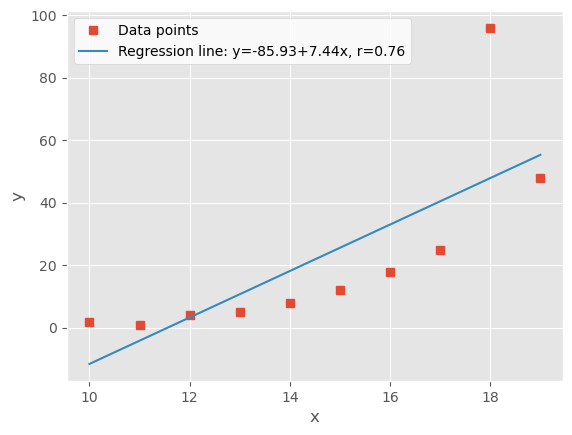

In [70]:
# X-Y Plots With a Regression Line

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')

The red squares represent the observations, while the blue line is the regression line. Its equation is listed in the legend, together with the correlation coefficient.
Remove ads
Heatmaps of Correlation Matrices

The correlation matrix can become really big and confusing when you have a lot of features! Fortunately, you can present it visually as a heatmap where each field has the color that corresponds to its value. You’ll need the correlation matrix:

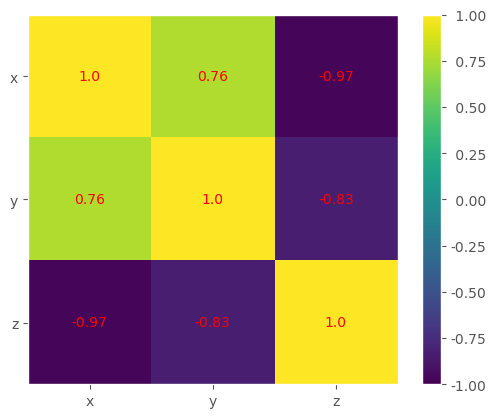

In [71]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
# note here we round the numbers in the correlation matrix 
# with .round(), as they’re going to be shown be on the heatmap.

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')

The result is a table with the coefficients. It sort of looks like the pandas output with colored backgrounds. The colors help you interpret the output. In this example, the yellow color represents the number 1, green corresponds to 0.76, and purple is used for the negative numbers.


The table `hybrid` contains data on hybrid passenger cars sold in the
United States from 1997 to 2013. The data were adapted from the online
data archive of [Prof. Larry Winner](http://www.stat.ufl.edu/%7Ewinner/)
of the University of Florida. The columns:

- `vehicle`: model of the car
- `year`: year of manufacture
- `msrp`: manufacturer's suggested retail price in 2013 dollars
- `acceleration`: acceleration rate in km per hour per second
- `mpg`: fuel economy in miles per gallon
- `class`: the model's class.

You can download the file via [hybrid.csv]({{ site.baseurl
}}/data/hybrid.csv).

In [72]:
hybrid = pd.read_csv('./data/hybrid_reg.csv')
hybrid.head()

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,1,Prius (1st Gen),1997,24509.74,7.46,41.26,41.26,C,1
1,2,Tino,2000,35354.97,8.20,54.10,54.10,C,1
2,3,Prius (2nd Gen),2000,26832.25,7.97,45.23,45.23,C,1
3,4,Insight,2000,18936.41,9.52,53.00,53.00,TS,7
4,5,Civic (1st Gen),2001,25833.38,7.04,47.04,47.04,C,1


The graph below is a scatter plot of `msrp` *versus* `acceleration`.
That means `msrp` is plotted on the vertical axis and `accelaration` on
the horizontal.

<Axes: xlabel='accelrate', ylabel='msrp'>

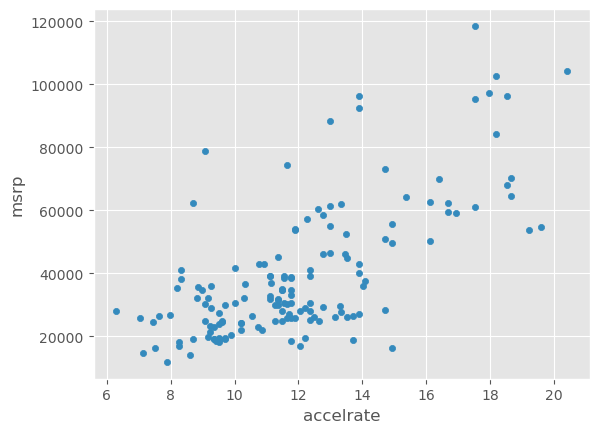

In [73]:
hybrid.plot.scatter('accelrate', 'msrp')

Notice the positive association. The scatter of points is sloping
upwards, indicating that cars with greater acceleration tended to cost
more, on average; conversely, the cars that cost more tended to have
greater acceleration on average. 

The scatter diagram of MSRP versus miles per gallon shows a negative
association. Hybrid cars with higher miles per gallon tended to cost
less, on average. This seems surprising till you consider that cars that
accelerate fast tend to be less fuel efficient and have lower miles per
gallon. As the previous scatter plot showed, those were also the cars
that tended to cost more.

<Axes: xlabel='mpg', ylabel='msrp'>

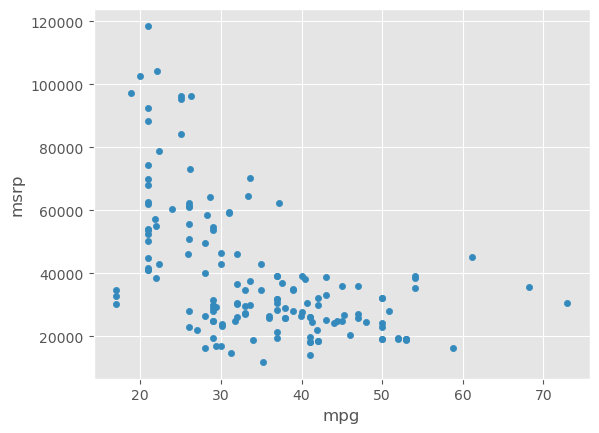

In [74]:
hybrid.plot.scatter('mpg', 'msrp')

Along with the negative association, the scatter diagram of price versus
efficiency shows a non-linear relation between the two variables. The
points appear to be clustered around a curve, not around a straight
line.

If we restrict the data just to the SUV class, however, the association
between price and efficiency is still negative but the relation appears
to be more linear. The relation between the price and acceleration of
SUVs also shows a linear trend, but with a positive slope.

<Axes: xlabel='mpg', ylabel='msrp'>

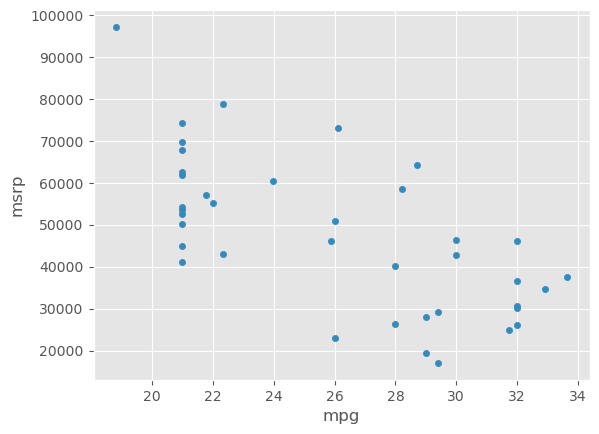

In [75]:
suv = hybrid[hybrid['carclass'] == 'SUV']
suv.plot.scatter('mpg', 'msrp')

<Axes: xlabel='accelrate', ylabel='msrp'>

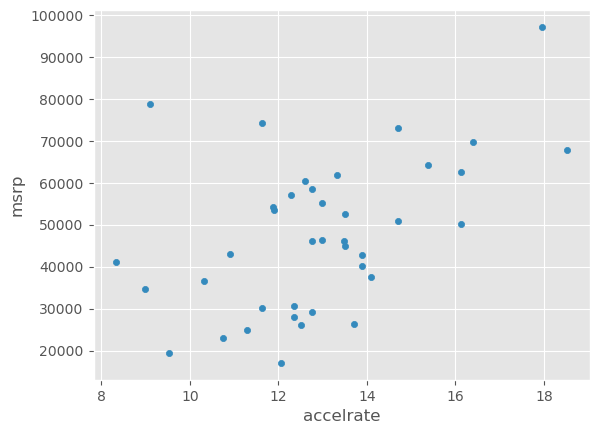

In [76]:
suv.plot.scatter('accelrate', 'msrp')

You will have noticed that we can derive useful information from the
general orientation and shape of a scatter diagram even without paying
attention to the units in which the variables were measured.

Indeed, we could plot all the variables in standard units and the plot
would look the same. This gives us a way to compare the degree of
linearity in two scatter diagrams.

Recall that in an earlier section we defined the function
`standard_units` to convert an array of numbers to standard units.

In [77]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.mean(x))/np.std(x)

We can use this function to re-draw the two scatter diagrams for SUVs,
with all the variables measured in standard units.

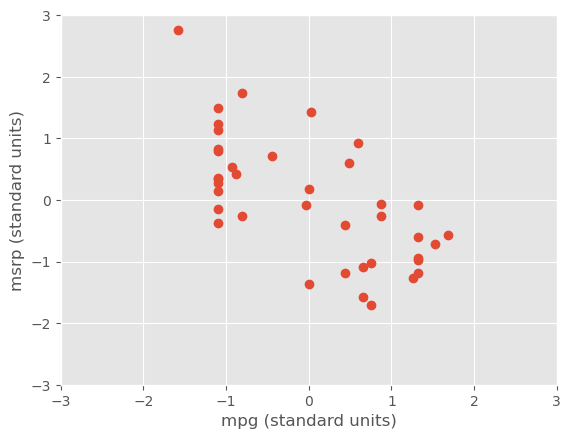

In [78]:
suv_mpg_su = standard_units(suv['mpg'])
suv_msrp_su = standard_units(suv['msrp'])
plt.plot(suv_mpg_su, suv_msrp_su, 'o')
plt.xlabel('mpg (standard units)')
plt.ylabel('msrp (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

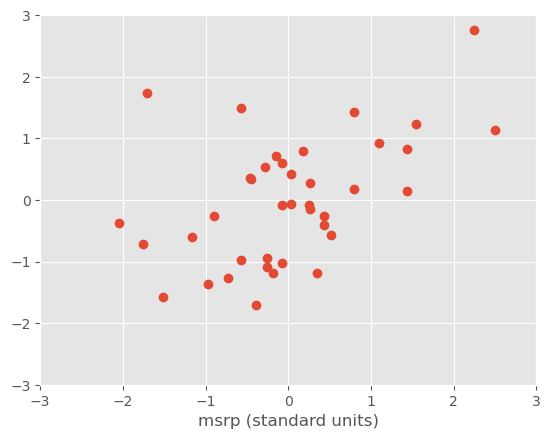

In [79]:
plt.plot(standard_units(suv['accelrate']),
         standard_units(suv['msrp']), 'o')
plt.xlabel('acceleration (standard units)')
plt.xlabel('msrp (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

The associations that we see in these figures are the same as those we
saw before. Also, because the two scatter diagrams are now drawn on
exactly the same scale, we can see that the linear relation in the
second diagram is a little more fuzzy than in the first.

We will now define a measure that uses standard units to quantify the
kinds of association that we have seen.


## The correlation coefficient ##

The *correlation coefficient* measures the strength of the linear
relationship between two variables. Graphically, it measures how
clustered the scatter diagram is around a straight line.

The term *correlation coefficient* isn't easy to say, so it is usually
shortened to *correlation* and denoted by $r$.

Here are some mathematical facts about $r$ that we will just observe by
simulation.

- The correlation coefficient $r$ is a number between $-1$ and 1.
- $r$ measures the extent to which the scatter plot clusters around
  a straight line.
- $r = 1$ if the scatter diagram is a perfect straight line sloping
  upwards, and $r = -1$ if the scatter diagram is a perfect straight
  line sloping downwards.

The function ``r_scatter`` takes a value of $r$ as its argument and
simulates a scatter plot with a correlation very close to $r$. Because
of randomness in the simulation, the correlation is not expected to be
exactly equal to $r$.

Call ``r_scatter`` a few times, with different values of $r$ as the
argument, and see how the scatter plot changes. 

When $r=1$ the scatter plot is perfectly linear and slopes upward. When
$r=-1$, the scatter plot is perfectly linear and slopes downward. When
$r=0$, the scatter plot is a formless cloud around the horizontal axis,
and the variables are said to be *uncorrelated*.

In [82]:
def r_scatter(r):
    plt.figure(figsize=(5,5))
    # Generate a scatter plot with a correlation approximately r
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

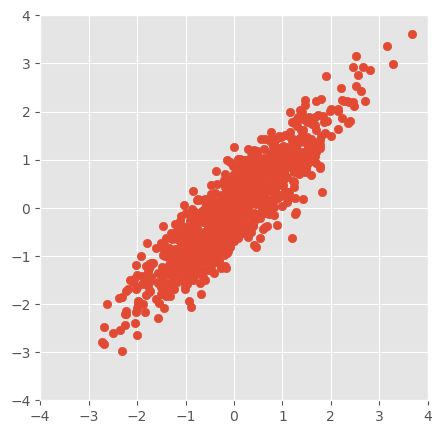

In [83]:
r_scatter(0.9)

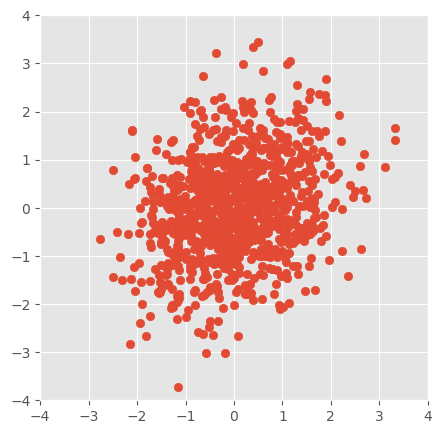

In [84]:
r_scatter(0.25)

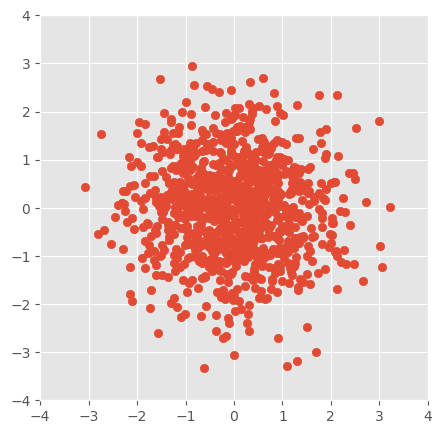

In [85]:
r_scatter(0)

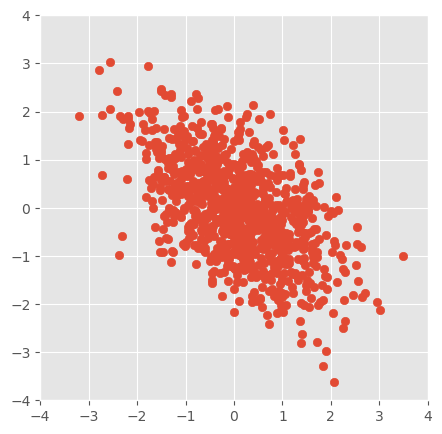

In [86]:
r_scatter(-0.55)

## $r$ is the least squares slope in standard units

Imagine we are interested in the least squares straight line relating the 'mpg' values *in standard units* to the 'mrsp' values *in standard units*.

We would follow the recipe we know from our previous regressions.

In [87]:
def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

Find the best intercept and slope:

In [88]:
from scipy.optimize import minimize
best_c, best_s = minimize(ss_any_line, [0, -0.5],
                          args=(suv_mpg_su, suv_msrp_su)).x
print('Intercept', best_c)
print('Slope', best_s)

Intercept 0.0
Slope -0.6667143664191213


Notice that the intercept is exactly (or very close to) zero.  In fact, it turns out that
this will always be so *when we calculate the line on arrays in standard
units*.

The slope is $r$ - the correlation coefficient.

**The correlation coefficient is the least-squares slope between the two input arrays that have been converted to standard units**.

We will soon see that we can get this same value, without using `minimize`, using a simple calculation on the x and y values.

## $r$ by calculation

The formula for $r$ is not apparent from our observations so far. It has
a mathematical basis that is outside the scope of this class. However,
as you will see, the calculation is straightforward and helps us
understand several of the properties of $r$.

**Formula for $r$**:

**$r$ is the average of the products of the two variables, when both
variables are measured in standard units.**

Here are the steps in the calculation. We will apply the steps to
a simple table of values of $x$ and $y$.

In [89]:
x = np.arange(1, 7)
y = np.array([2, 3, 1, 5, 2, 7])
t = pd.DataFrame()
t['x'] = x
t['y'] = y
t

,x,y
0,1,2
1,2,3
2,3,1
3,4,5
4,5,2
5,6,7


Based on the scatter diagram, we expect that $r$ will be positive but
not equal to 1.

<Axes: xlabel='x', ylabel='y'>

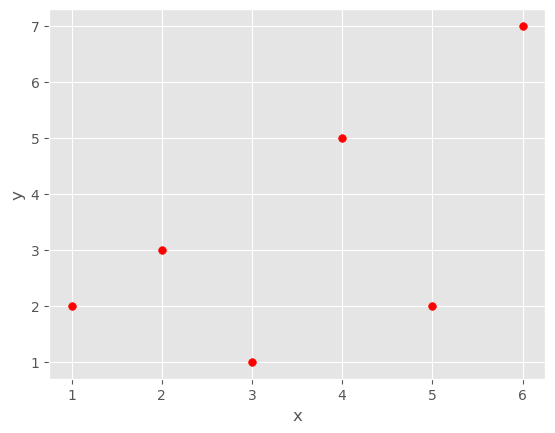

In [90]:
t.plot.scatter('x', 'y', s=30, color='red')

# Example cross-correlation

In [91]:
import seaborn as sns
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
# load the Auto dataset
auto_df = pd.read_csv('./data/auto-mpg.csv')

In [94]:
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<Axes: >

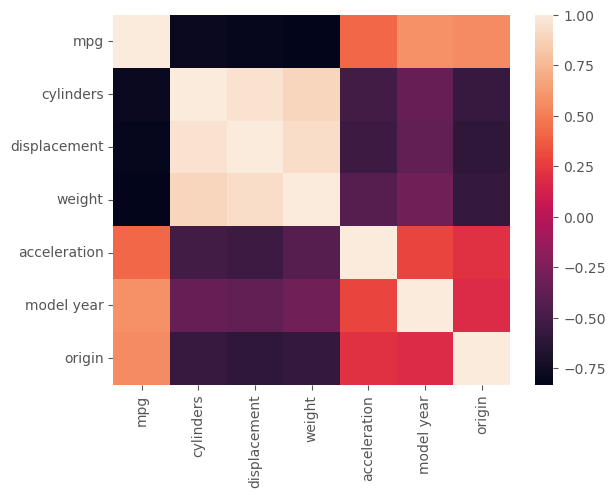

In [95]:
# calculate the correlation matrix on the numeric columns
corr = auto_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [97]:
# now try IMDB
data = pd.read_csv('./data/IMDB-Movie-Data.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


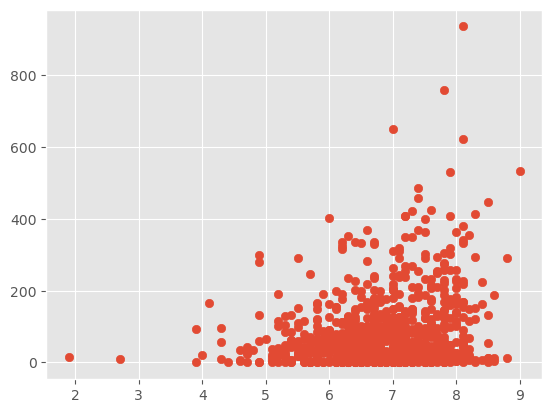

In [99]:
plt.scatter(data['Rating'],data['Revenue (Millions)'])

<Axes: >

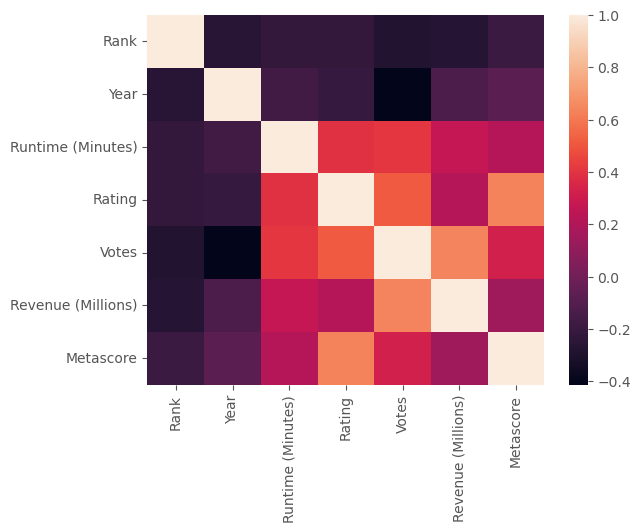

In [100]:
correlation_matrix = data.select_dtypes('number').corr()
sns.heatmap(correlation_matrix)

Read SST data from APDRC

In [101]:
import xarray as xr
url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/MODIS_Aqua/4km_sst4'
data = xr.open_dataset(url)

/Users/jimp/anaconda3/lib/python3.11/site-packages/xarray/coding/times.py:206: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


In [102]:
# strip region and location near Hawaii
region_data = data.sel(lat=slice(0,60),lon=slice(-180,-120))
point_data = data.sel(lat=20,lon=-158,method='nearest').squeeze()

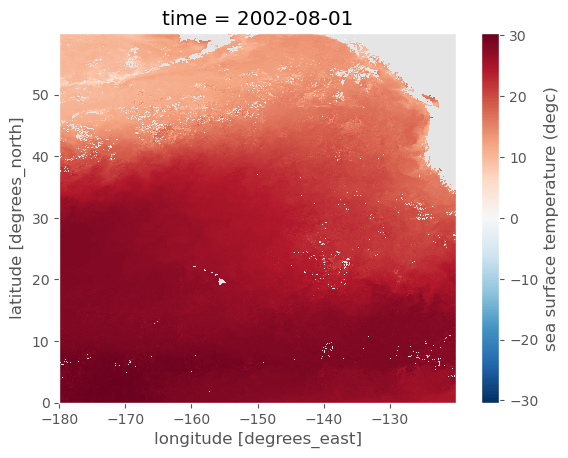

In [103]:
# make a quick plot
data1 = region_data.isel(time=1).squeeze()
data1.sst4.plot()

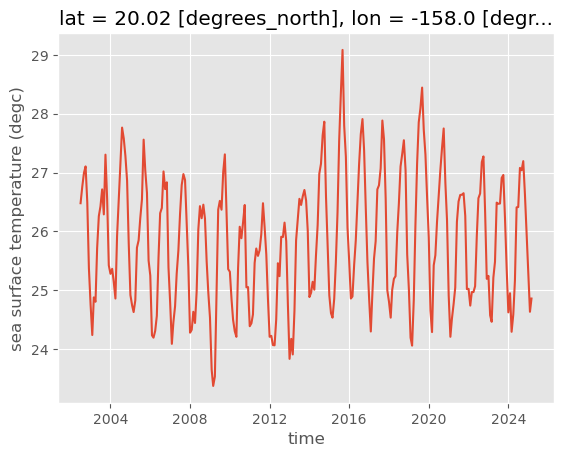

In [104]:
point_data.sst4.plot()

In [105]:
x1 = region_data.sst4.isel(lat=100,lon=100).squeeze()
x2 = point_data.sst4

In [106]:
r = xr.corr(x1,x2)
print(r)

<xarray.DataArray 'sst4' ()> Size: 8B
array(0.56895446)


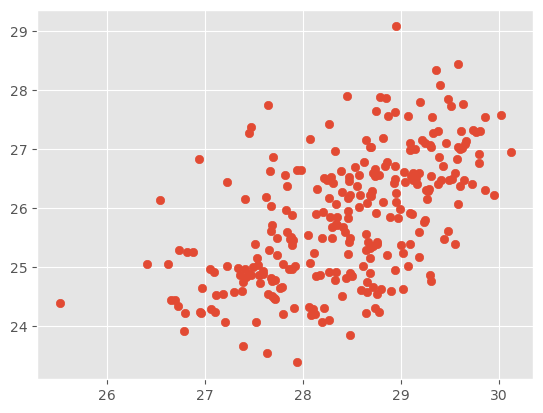

In [107]:
plt.scatter(x1,x2)

In [108]:
import numpy as np
B = np.polyfit(x1,x2,1)

In [109]:
B

array([0.74540797, 4.62455707])

In [110]:
.74*.74

0.5476

In [111]:
for lag in range(10):
    A = x1[:-2]
    B = x2[1:]
    print(lag,xr.corr(x1[:-1-lag],B[lag:-1]))
#xcorrel_lag = [xr.corr(x1.isel[0:-i],x2.isel[i:-1]) for i in range(12)]

0 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.56674166)
1 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.5637884)
2 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.56325123)
3 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.56282932)
4 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.56269799)
5 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.56411176)
6 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.5677231)
7 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.56984989)
8 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.56773484)
9 <xarray.DataArray 'sst4' ()> Size: 8B
array(0.56811543)


In [112]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
from  scipy import stats, signal

In [113]:
url = 'http://psl.noaa.gov/thredds/dodsC/Datasets/gpcp/precip.mon.mean.nc'
ds   = xr.open_dataset(url)
data = ds.precip

Text(0, 0.5, 'mm/day')

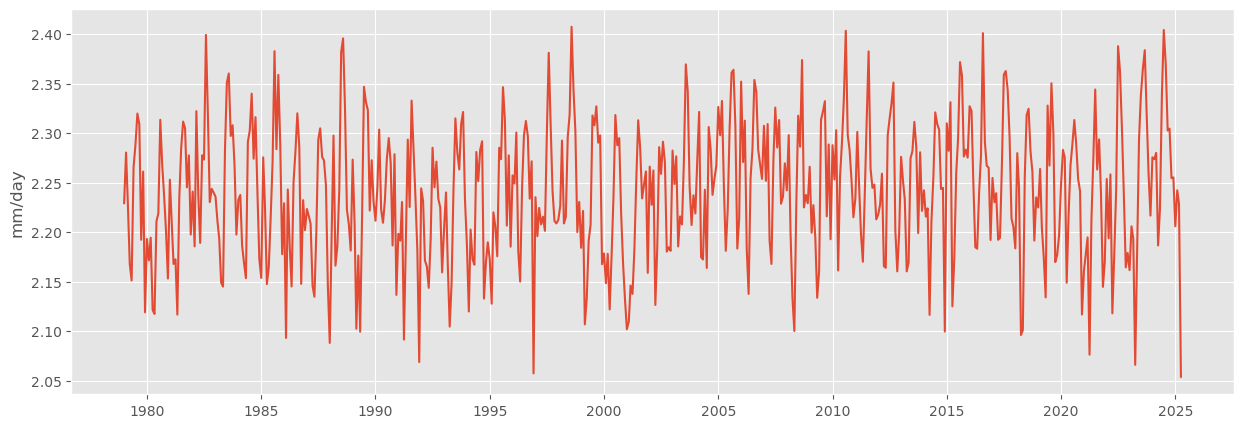

In [114]:
#Plot global mean time series
plt.figure(figsize=(15, 5))
plt.plot(data.time, data.mean(axis=(1,2)), label = 'original')
plt.ylabel(data.units)

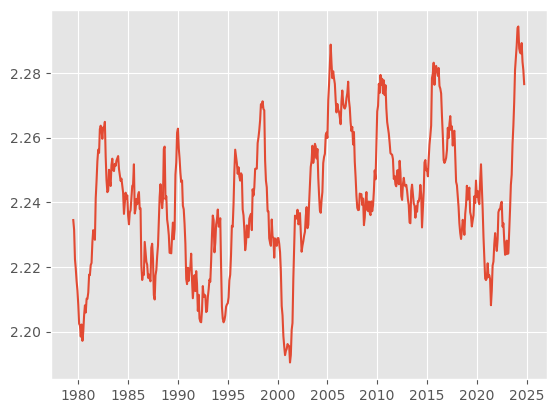

In [115]:
"""Remove seasonality as it would influence the correlation:
Take a 12-month moving average; 
The average will affect all values in the first and last 6 months, so remove them.
"""
data = data.rolling(time= 12, center=True).mean()[6:-6,...] 

plt.plot(data.time, data.mean(axis=(1,2)), label = '12-mo ma')

Text(0.5, 1.0, 'Mean Global Precipitation')

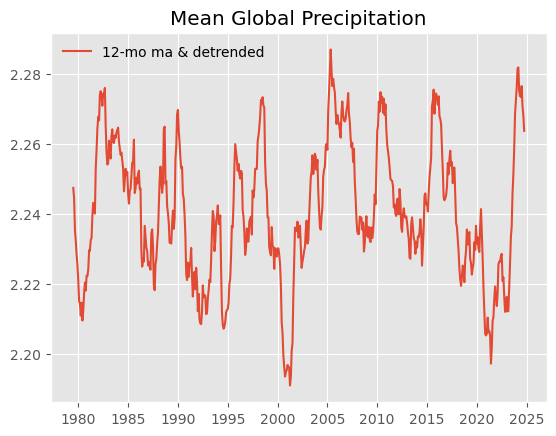

In [116]:
"""Detrend data as it would influence the correlation"""
mean = data.mean(axis=0)
data = xr.DataArray(signal.detrend(data, axis=0), dims=data.dims, coords=data.coords) + mean
plt.plot(data.time, data.mean(axis=(1,2)), label = '12-mo ma & detrended')
plt.legend(loc = 'upper left', ncol = 3).draw_frame(False)
plt.title('Mean Global Precipitation')

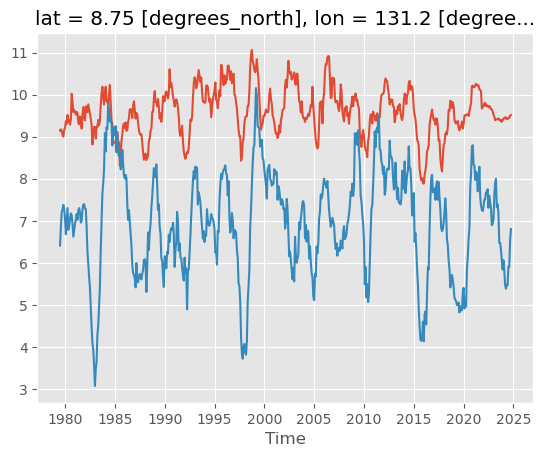

In [117]:
ts1 = data[:,36,116]
ts2 = data[:,39,52]
ts1.plot()
ts2.plot()

In [118]:
def lag_linregress_3D(x, y, lagx=0, lagy=0):
    """
    Input: Two xr.Datarrays of any dimensions with the first dim being time. 
    Thus the input data could be a 1D time series, or for example, have three dimensions (time,lat,lon). 
    Datasets can be provied in any order, but note that the regression slope and intercept will be calculated
    for y with respect to x.
    Output: Covariance, correlation, regression slope and intercept, p-value, and standard error on regression
    between the two datasets along their aligned time dimension.  
    Lag values can be assigned to either of the data, with lagx shifting x, and lagy shifting y, with the specified lag amount. 
    """ 
    #1. Ensure that the data are properly alinged to each other. 
    x,y = xr.align(x,y)
    
    #2. Add lag information if any, and shift the data accordingly
    if lagx!=0:
        #If x lags y by 1, x must be shifted 1 step backwards. 
        #But as the 'zero-th' value is nonexistant, xr assigns it as invalid (nan). Hence it needs to be dropped
        x   = x.shift(time = -lagx).dropna(dim='time')
        #Next important step is to re-align the two datasets so that y adjusts to the changed coordinates of x
        x,y = xr.align(x,y)

    if lagy!=0:
        y   = y.shift(time = -lagy).dropna(dim='time')
        x,y = xr.align(x,y)
 
    #3. Compute data length, mean and standard deviation along time axis for further use: 
    n     = x.shape[0]
    xmean = x.mean(axis=0)
    ymean = y.mean(axis=0)
    xstd  = x.std(axis=0)
    ystd  = y.std(axis=0)
    
    #4. Compute covariance along time axis
    cov   =  np.sum((x - xmean)*(y - ymean), axis=0)/(n)
    
    #5. Compute correlation along time axis
    cor   = cov/(xstd*ystd)
    
    #6. Compute regression slope and intercept:
    slope     = cov/(xstd**2)
    intercept = ymean - xmean*slope  
    
    #7. Compute P-value and standard error
    #Compute t-statistics
    tstats = cor*np.sqrt(n-2)/np.sqrt(1-cor**2)
    stderr = slope/tstats
    
    from scipy.stats import t
    pval   = t.sf(tstats, n-2)*2
    pval   = xr.DataArray(pval, dims=cor.dims, coords=cor.coords)

    return cov,cor,slope,intercept,pval,stderr


In [119]:
cov,cor,slope,intercept,pval,stderr = lag_linregress_3D(x=ts1,y=data)

print ('x = 1-dim, y = 3-dim:\n', cor[39,52].data, pval[39,52].data, 
       slope[39,52].data, intercept[39,52].data, stderr[39,52].data)

ans = stats.linregress(ts1,ts2)
print ('stats.linregress() output:\n',ans.rvalue, ans.pvalue, ans.slope, ans.intercept, ans.stderr)

cov,cor,slope,intercept,pval,stderr =  lag_linregress_3D(ts1,ts2)

x = 1-dim, y = 3-dim:
 0.3845314500993508 1.2977115487908085e-20 0.8648337051249274 -1.3297897252567097 0.08917753086918749
stats.linregress() output:
 0.3845315800840855 1.2976698645956503e-20 0.8648335088718782 -1.3297931380919223 0.08917747525664815


/Users/jimp/anaconda3/lib/python3.11/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


In [120]:
cov,cor,slope,intercept,pval,stderr = lag_linregress_3D(x=ts1,y=data, lagx=1)
print (cor[39,52].data, pval[39,52].data, slope[39,52].data, intercept[39,52].data, stderr[39,52].data)

"""To compare, we will have to remove the first value from ts1, and last from ts2"""
ans = stats.linregress(ts1[1:],ts2[:-1])
print (ans.rvalue, ans.pvalue, ans.slope, ans.intercept, ans.stderr)


0.37240215719636577 2.6353720951340125e-19 0.838060407065293 -1.0732002056368657 0.08979371090798464
0.37240199185949746 2.6354751574476614e-19 0.838060040524665 -1.0732026041816258 0.08979371792014233
